In [2]:
#load vgg model 
from keras.applications.vgg16 import VGG16
# load the model 
model = VGG16()
# summarize the model 
model.summary()

553467904/553467096 [==============================] - 20s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

In [3]:
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue 
        
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [4]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [6]:
# normalize filter values to 0-1 so we can visualize them 
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

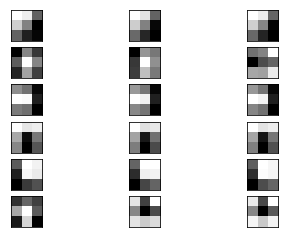

In [8]:
# plot first few filters 
n_filters, ix = 6, 1 
for i in range(n_filters):
    # get the filters 
    f = filters[:, :, :, i]
    # plot each channel separately 
    for j in range(3):
        # specify subplot and turn of axis 
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale 
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1 
pyplot.show()

In [9]:
# summarize feature map shapes 
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue 
    # summarize output shape 
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (?, 224, 224, 64)
2 block1_conv2 (?, 224, 224, 64)
4 block2_conv1 (?, 112, 112, 128)
5 block2_conv2 (?, 112, 112, 128)
7 block3_conv1 (?, 56, 56, 256)
8 block3_conv2 (?, 56, 56, 256)
9 block3_conv3 (?, 56, 56, 256)
11 block4_conv1 (?, 28, 28, 512)
12 block4_conv2 (?, 28, 28, 512)
13 block4_conv3 (?, 28, 28, 512)
15 block5_conv1 (?, 14, 14, 512)
16 block5_conv2 (?, 14, 14, 512)
17 block5_conv3 (?, 14, 14, 512)


In [22]:
# redefine model to output right after the first hidden layer
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims 
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [15]:
# load the image with the required shape 
img = load_img('bird.jpg', target_size=(224, 224))

In [16]:
# convert the image to an array
img = img_to_array(img)

In [17]:
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

In [18]:
# prepare the image(e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [19]:
# get features map for the first hidden layer
feature_maps = model.predict(img)

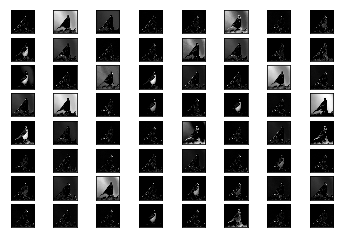

In [21]:
# plot all 64 maps in an 8x8 squares
square = 8 
ix = 1 
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis 
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale 
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1 
# show the figure 
pyplot.show()

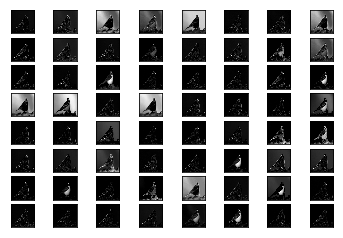

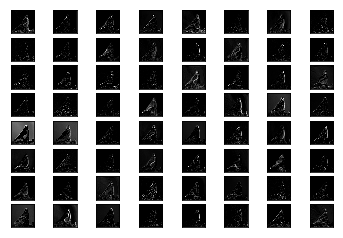

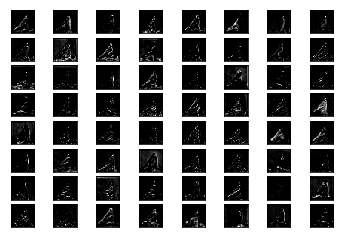

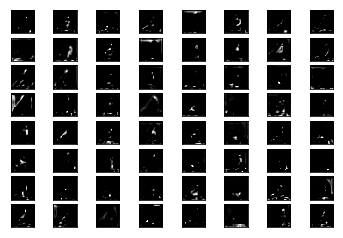

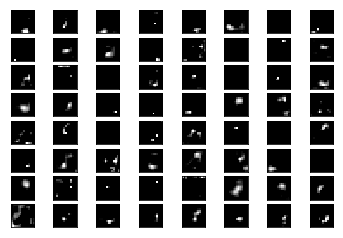

In [25]:
# load the model 
model = VGG16()
# redefine model to output right after the first hidden layer 
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape 
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array 
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8 
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1 
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis 
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale 
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1 
    # show the figure 
    pyplot.show()

In [33]:
outputs

[<tf.Tensor 'block1_conv2_2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block2_conv2_2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block3_conv3_2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block4_conv3_2/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 <tf.Tensor 'block5_conv3_2/Relu:0' shape=(?, 14, 14, 512) dtype=float32>]